In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [16]:
train = pd.read_csv("./data.csv")
test = pd.read_csv("./test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# 注意，Fare特征在train不缺，但在test中缺一个
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [19]:
# 筛选出有用的特征
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

#对缺失值进行处理
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

In [20]:
# 将字符转换为数字
train.loc[train["Sex"]=="male","Sex"] = 0
train.loc[train["Sex"]=="female","Sex"] = 1

test.loc[test["Sex"]=="male","Sex"] = 0
test.loc[test["Sex"]=="female","Sex"] = 1


#将上船地点转换为数字,缺失值用最多的“S”填充

train["Embarked"] = train["Embarked"].fillna('S')
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

In [21]:
print(train["Embarked"].unique())
print(test["Embarked"].unique())

[0 1 2]
[2 0 1]


In [22]:
X = train[predictors]
X.head(8)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
5,3,0,28.0,0,0,8.4583,2
6,1,0,54.0,0,0,51.8625,0
7,3,0,2.0,3,1,21.0750,0


In [23]:
y=train["Survived"]
y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [24]:
# 划分数据集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

In [25]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
878,3,0,28.0,0,0,7.8958,0
799,3,1,30.0,1,1,24.1500,0
478,3,0,22.0,0,0,7.5208,0
785,3,0,25.0,0,0,7.2500,0
409,3,1,28.0,3,1,25.4667,0


In [26]:

clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)

print(score_)

score = cross_val_score(clf,X,y,cv=10).mean()

print(score)

0.7947761194029851
0.7879400749063671


0.8171660424469414


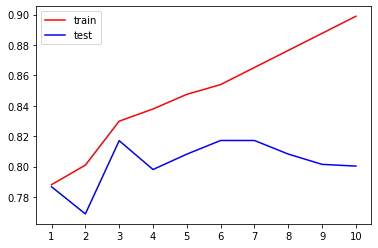

In [27]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()
# 深度越大，过拟合现象越严重

In [28]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.02631578947368421,
                                                   0.05263157894736842,
                                                   0.07894736842105263,
                                                   0.10526315789473684,
                                                   0.13157894736842105,
                                                   0.15789473684210525,
                                                   0.18421052631578946,
                                                   0.21052631578947367,
                                                   0.23684210526315788,
                                                   0.2631578947368421,
                                                   0.2894736842105263,
        

In [29]:
# 最优参数组合
GS.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [30]:
# 评分
GS.best_score_

0.8250384024577573

In [31]:
clf = DecisionTreeClassifier(criterion='entropy'
                             ,max_depth=5
                             ,min_impurity_decrease=0
                             ,min_samples_leaf=1
                             ,splitter='random')
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)

print(score_)

score = cross_val_score(clf,X,y,cv=10).mean()

print(score)

0.8134328358208955
0.8215480649188514


In [32]:
result = clf.predict(test[predictors])

In [33]:
print(result)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]


In [34]:
submission_df = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission_df['PassengerId'] = test["PassengerId"]
submission_df['Survived'] = result
submission_df.to_csv('submissions.csv', header=True, index=False)
submission_df.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# 结果
- 第一次：0.7703
- 第二次：0.78708